In [5]:
import pandas as pd
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')
print("First 5 rows:")
print(df.head())
print("\nData Info:")
print(df.info())

First 5 rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0     

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [7]:
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
print("\nRows with negative sales:")
print(df[df['Sales'] < 0])
df = df[df['Sales'] >= 0] 


Rows with negative sales:
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


In [10]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name() 

In [11]:
df.to_csv('cleaned_superstore.csv', index=False)
print("Cleaned data saved as 'cleaned_superstore.csv'")

Cleaned data saved as 'cleaned_superstore.csv'


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleaned_superstore.csv')
print(df.head()) 

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    B

In [13]:
print("\nSummary Statistics:")
print(df[['Sales', 'Profit']].describe())


Summary Statistics:
              Sales       Profit
count   9994.000000  9994.000000
mean     229.858001    28.656896
std      623.245101   234.260108
min        0.444000 -6599.978000
25%       17.280000     1.728750
50%       54.490000     8.666500
75%      209.940000    29.364000
max    22638.480000  8399.976000


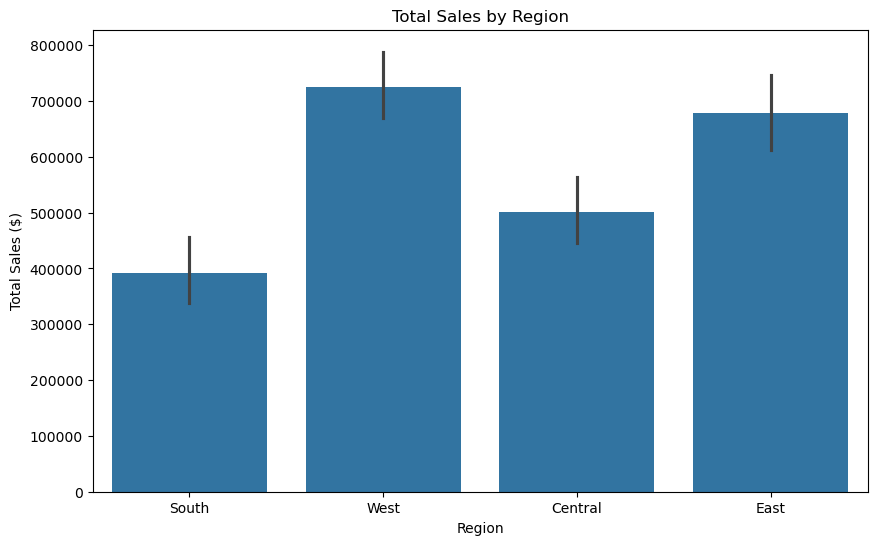

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Region')
plt.ylabel('Total Sales ($)')
plt.show()

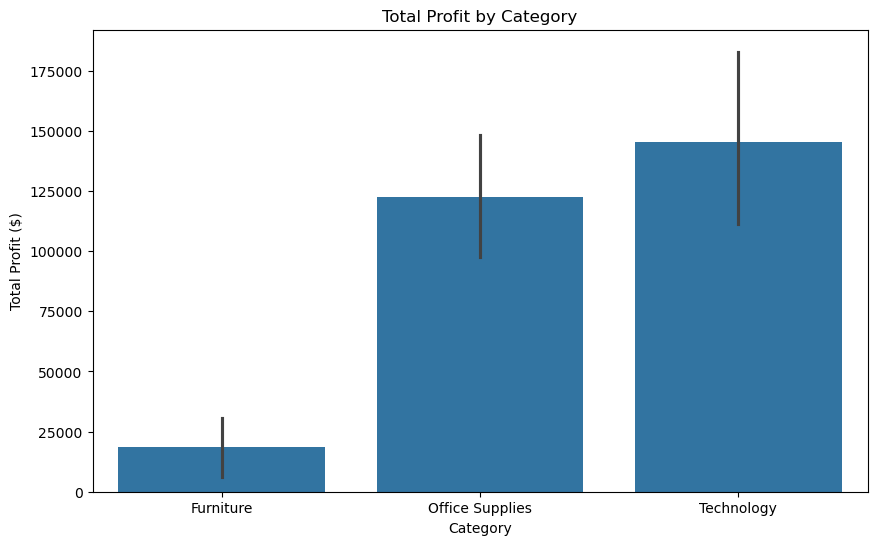

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=df, estimator=sum)
plt.title('Total Profit by Category')
plt.ylabel('Total Profit ($)')
plt.show()

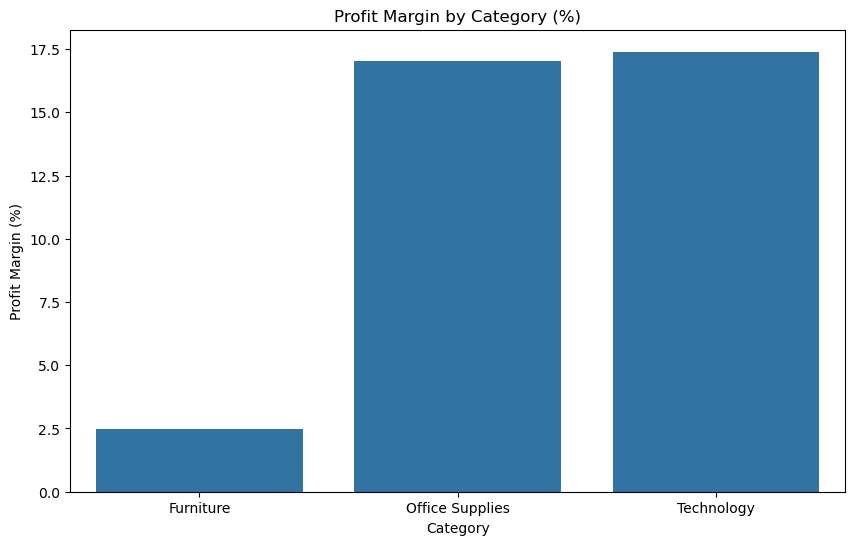

          Category       Profit        Sales  Profit Margin
0        Furniture   18451.2728  741999.7953       2.486695
1  Office Supplies  122490.8008  719047.0320      17.035158
2       Technology  145454.9481  836154.0330      17.395712


In [18]:
category_margin = df.groupby('Category').agg({'Profit': 'sum', 'Sales': 'sum'}).reset_index()
category_margin['Profit Margin'] = category_margin['Profit'] / category_margin['Sales'] * 100
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit Margin', data=category_margin)
plt.title('Profit Margin by Category (%)')
plt.ylabel('Profit Margin (%)')
plt.show()
print(category_margin)

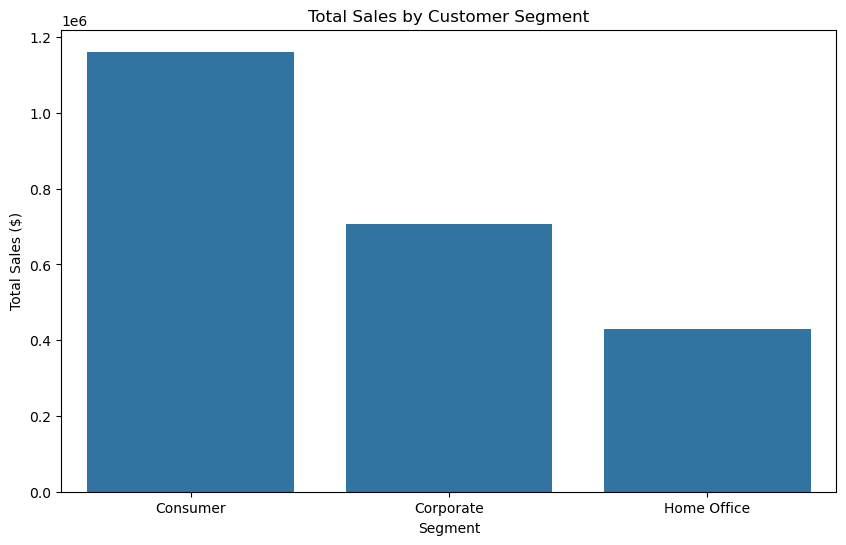

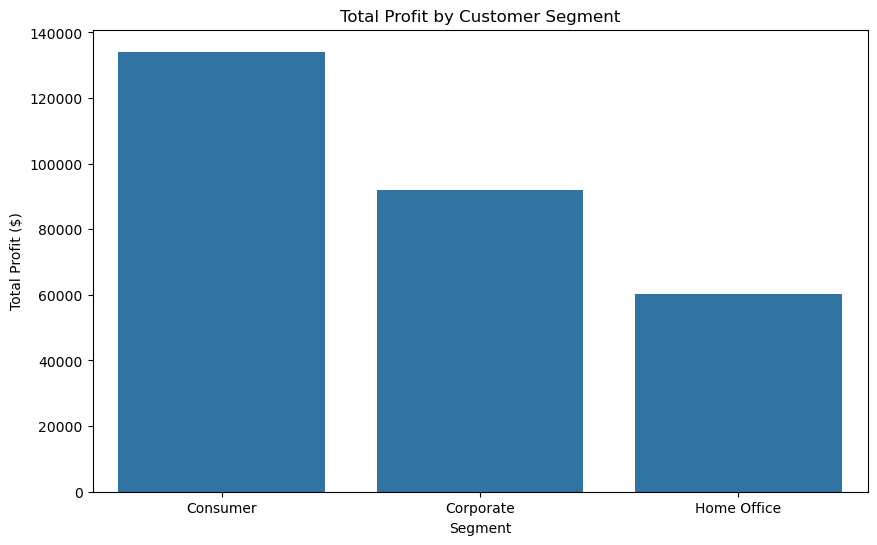

       Segment         Sales       Profit
0     Consumer  1.161401e+06  134119.2092
1    Corporate  7.061464e+05   91979.1340
2  Home Office  4.296531e+05   60298.6785


In [19]:

segment_analysis = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=segment_analysis)
plt.title('Total Sales by Customer Segment')
plt.ylabel('Total Sales ($)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Profit', data=segment_analysis)
plt.title('Total Profit by Customer Segment')
plt.ylabel('Total Profit ($)')
plt.show()
print(segment_analysis)

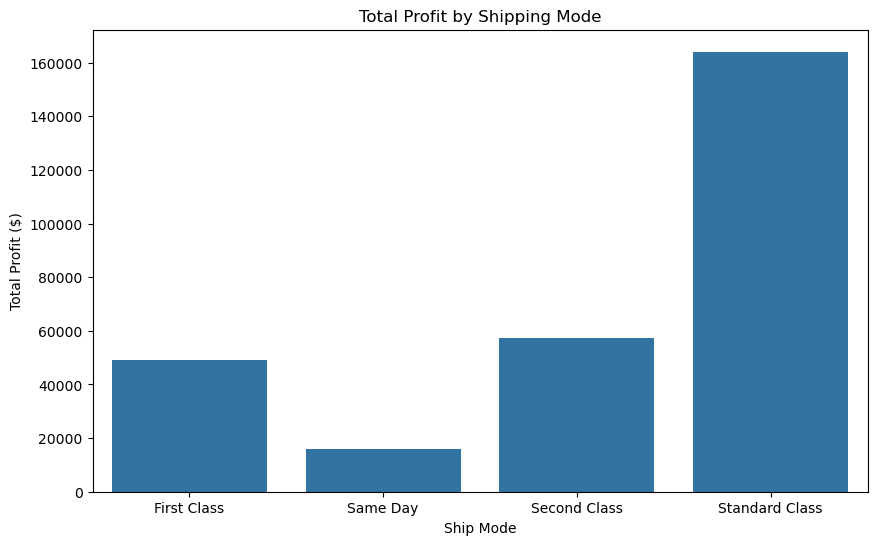

        Ship Mode         Sales       Profit  Quantity
0     First Class  3.514284e+05   48969.8399      5693
1        Same Day  1.283631e+05   15891.7589      1960
2    Second Class  4.591936e+05   57446.6354      7423
3  Standard Class  1.358216e+06  164088.7875     22797


In [20]:

ship_analysis = df.groupby('Ship Mode').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Profit', data=ship_analysis)
plt.title('Total Profit by Shipping Mode')
plt.ylabel('Total Profit ($)')
plt.show()
print(ship_analysis)

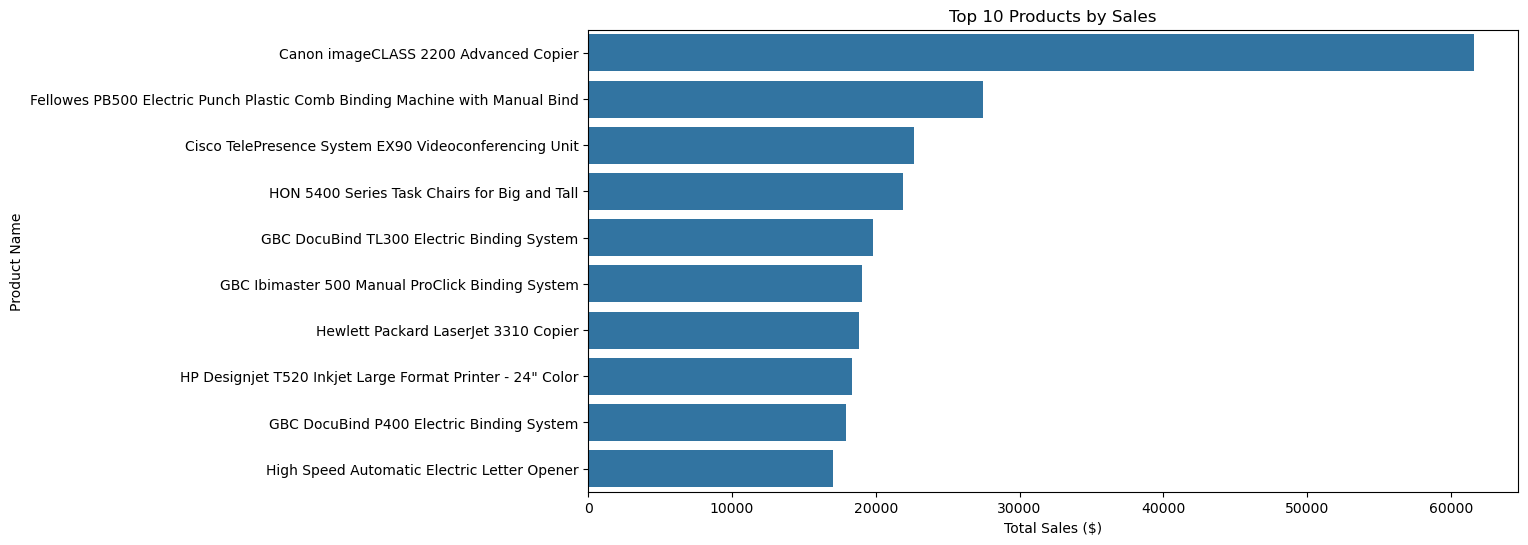

                                        Product Name      Sales
0              Canon imageCLASS 2200 Advanced Copier  61599.824
1  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
2  Cisco TelePresence System EX90 Videoconferenci...  22638.480
3       HON 5400 Series Task Chairs for Big and Tall  21870.576
4         GBC DocuBind TL300 Electric Binding System  19823.479
5   GBC Ibimaster 500 Manual ProClick Binding System  19024.500
6               Hewlett Packard LaserJet 3310 Copier  18839.686
7  HP Designjet T520 Inkjet Large Format Printer ...  18374.895
8          GBC DocuBind P400 Electric Binding System  17965.068
9        High Speed Automatic Electric Letter Opener  17030.312


In [21]:

top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Name', data=top_products)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales ($)')
plt.show()
print(top_products)

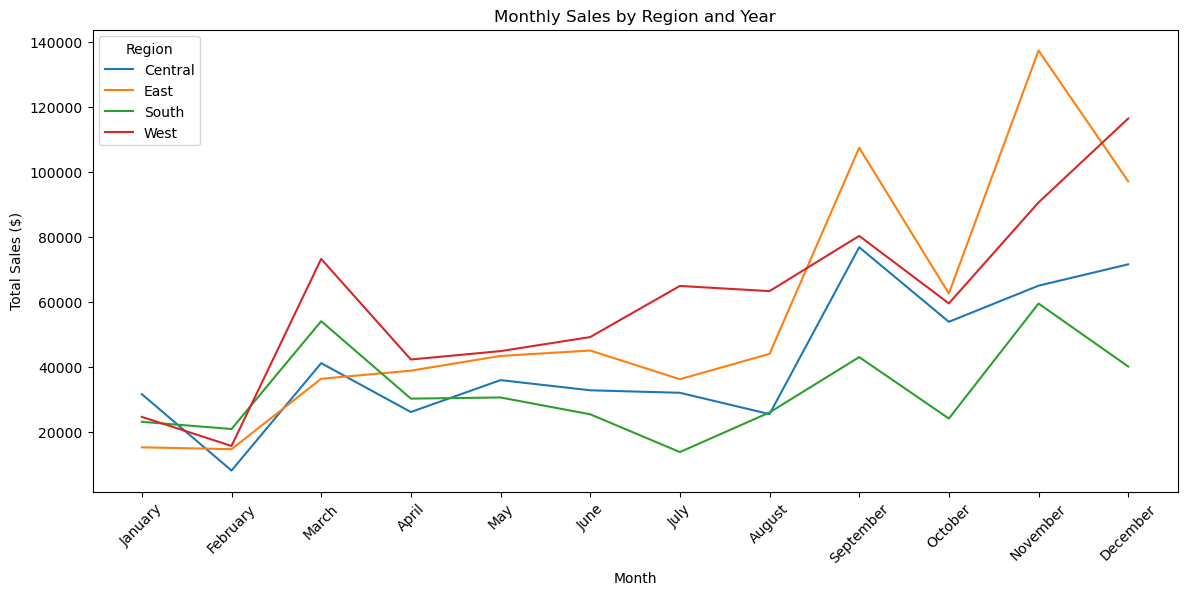

In [46]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']


monthly_region = df.groupby(['Month', 'Region'])['Sales'].sum().reset_index()

monthly_region['Month'] = pd.Categorical(monthly_region['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(14, 6))
sns.lineplot(x='Month', y='Sales', hue='Region', data=monthly_region)
plt.title('Monthly Sales by Region and Year')
plt.xticks(rotation=45)
plt.ylabel('Total Sales ($)')
plt.show()

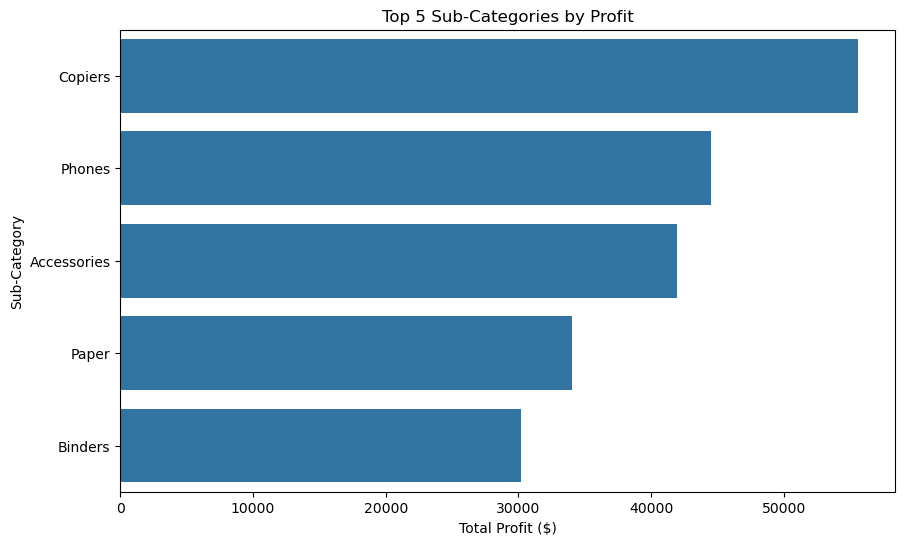

  Sub-Category      Profit
0      Copiers  55617.8249
1       Phones  44515.7306
2  Accessories  41936.6357
3        Paper  34053.5693
4      Binders  30221.7633


In [30]:

subcat_profit = df.groupby('Sub-Category')['Profit'].sum().nlargest(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Sub-Category', data=subcat_profit)
plt.title('Top 5 Sub-Categories by Profit')
plt.xlabel('Total Profit ($)')
plt.show()
print(subcat_profit)

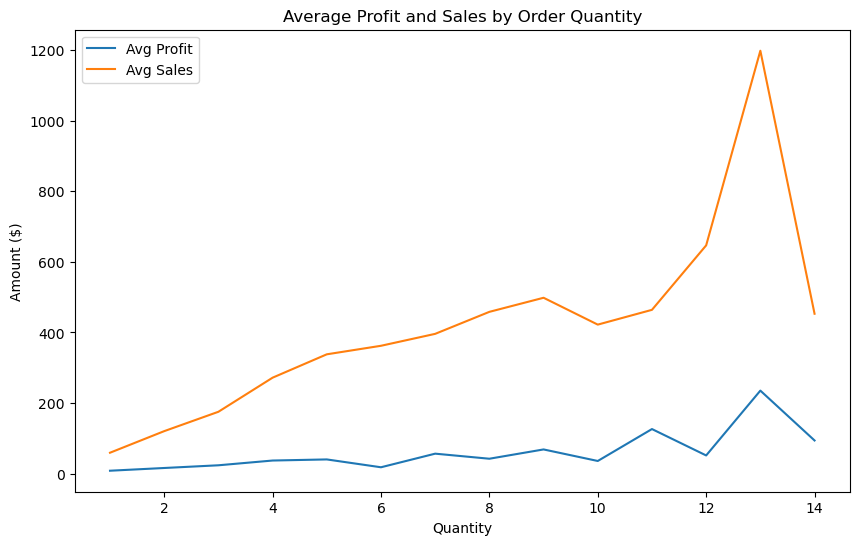

    Quantity      Profit        Sales
0          1    8.276396    59.234632
1          2   16.006831   120.354488
2          3   23.667715   175.201578
3          4   37.131310   271.764059
4          5   40.257394   337.936339
5          6   18.051517   362.101960
6          7   56.579163   395.888393
7          8   42.244342   458.210802
8          9   68.557716   498.083683
9         10   35.862404   422.046737
10        11  126.275503   463.896529
11        12   51.524609   646.452522
12        13  235.144481  1197.710704
13        14   93.931166   452.826138


In [31]:

quantity_analysis = df.groupby('Quantity').agg({'Profit': 'mean', 'Sales': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Quantity', y='Profit', data=quantity_analysis, label='Avg Profit')
sns.lineplot(x='Quantity', y='Sales', data=quantity_analysis, label='Avg Sales')
plt.title('Average Profit and Sales by Order Quantity')
plt.ylabel('Amount ($)')
plt.legend()
plt.show()
print(quantity_analysis)

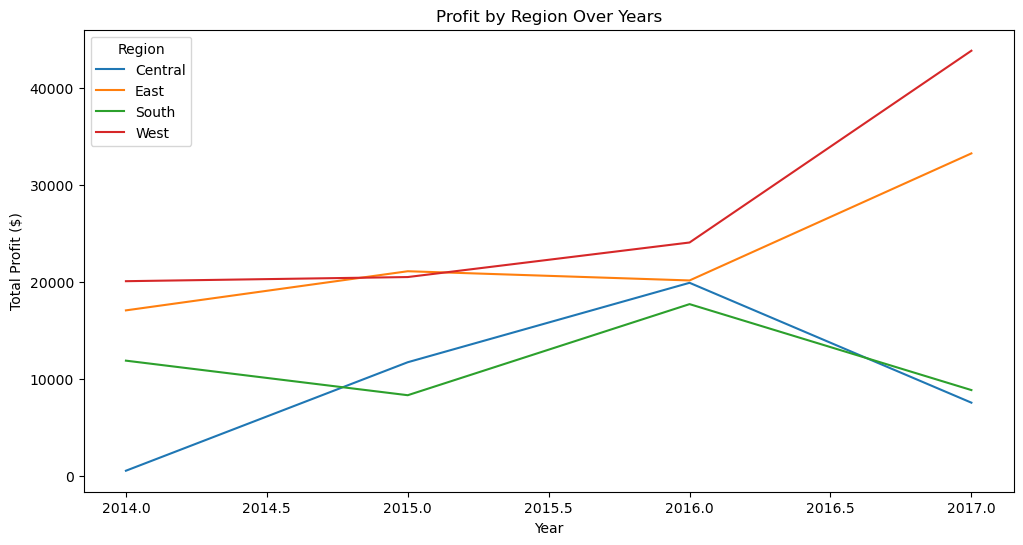

    Year   Region      Profit
0   2014  Central    539.5534
1   2014     East  17059.6095
2   2014    South  11879.1200
3   2014     West  20065.6912
4   2015  Central  11716.8020
5   2015     East  21091.0130
6   2015    South   8318.5940
7   2015     West  20492.1947
8   2016  Central  19899.1629
9   2016     East  20141.5961
10  2016    South  17702.8084
11  2016     West  24051.6069
12  2017  Central   7550.8442
13  2017     East  33230.5614
14  2017    South   8848.9079
15  2017     West  43808.9561


In [32]:

yearly_region = df.groupby(['Year', 'Region'])['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Profit', hue='Region', data=yearly_region)
plt.title('Profit by Region Over Years')
plt.ylabel('Total Profit ($)')
plt.show()
print(yearly_region)

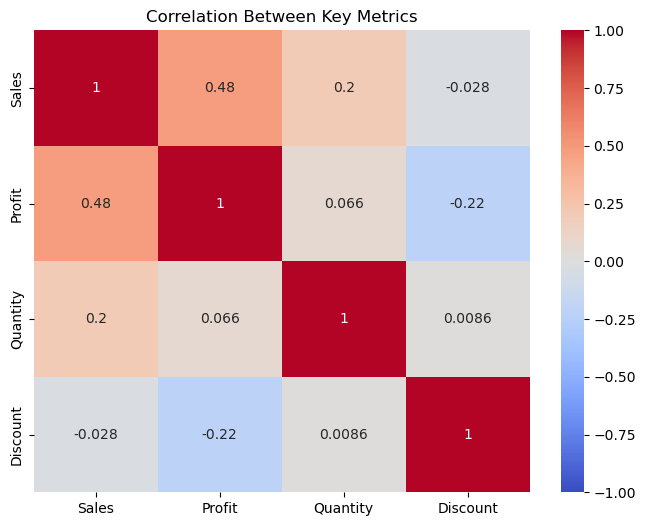

             Sales    Profit  Quantity  Discount
Sales     1.000000  0.479064  0.200795 -0.028190
Profit    0.479064  1.000000  0.066253 -0.219487
Quantity  0.200795  0.066253  1.000000  0.008623
Discount -0.028190 -0.219487  0.008623  1.000000


In [33]:

corr_data = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Key Metrics')
plt.show()
print(corr_data)

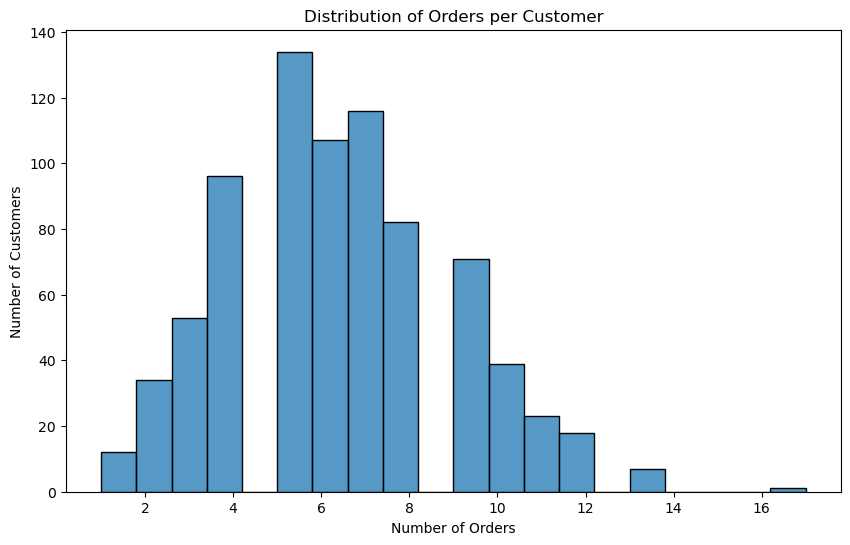

       Order Count
count   793.000000
mean      6.316520
std       2.550885
min       1.000000
25%       5.000000
50%       6.000000
75%       8.000000
max      17.000000


In [34]:

customer_orders = df.groupby('Customer Name')['Order ID'].nunique().reset_index()
customer_orders.columns = ['Customer Name', 'Order Count']

plt.figure(figsize=(10, 6))
sns.histplot(customer_orders['Order Count'], bins=20)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()
print(customer_orders.describe())


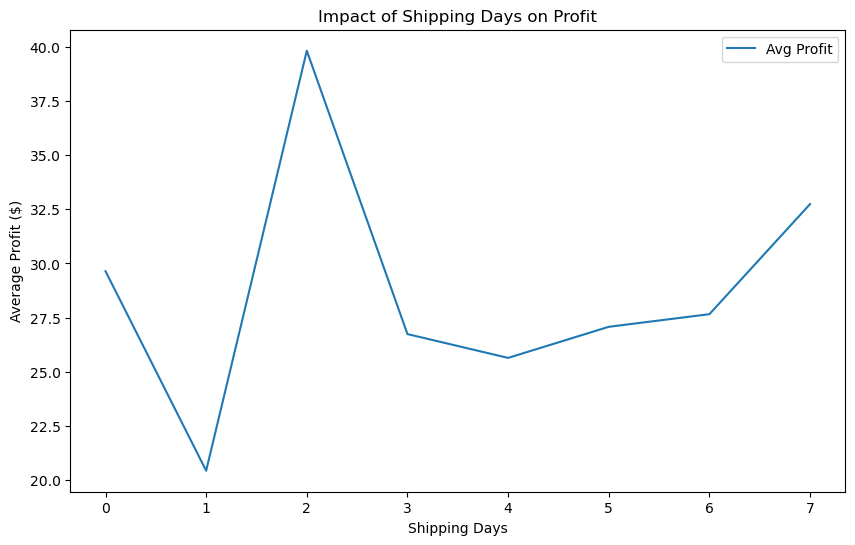

   Shipping Days     Profit       Sales
0              0  29.645411  240.669925
1              1  20.436929  184.214990
2              2  39.818676  276.211267
3              3  26.742208  203.641392
4              4  25.643394  227.774695
5              5  27.078471  227.919356
6              6  27.660821  199.742785
7              7  32.740494  265.213769


In [36]:

df['Order Date'] = pd.to_datetime(df['Order Date'])  # Ensure Order Date is datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'])    # Ensure Ship Date is datetime
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days
shipping_impact = df.groupby('Shipping Days').agg({'Profit': 'mean', 'Sales': 'mean'}).reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Shipping Days', y='Profit', data=shipping_impact, label='Avg Profit')
plt.title('Impact of Shipping Days on Profit')
plt.xlabel('Shipping Days')
plt.ylabel('Average Profit ($)')
plt.show()
print(shipping_impact)

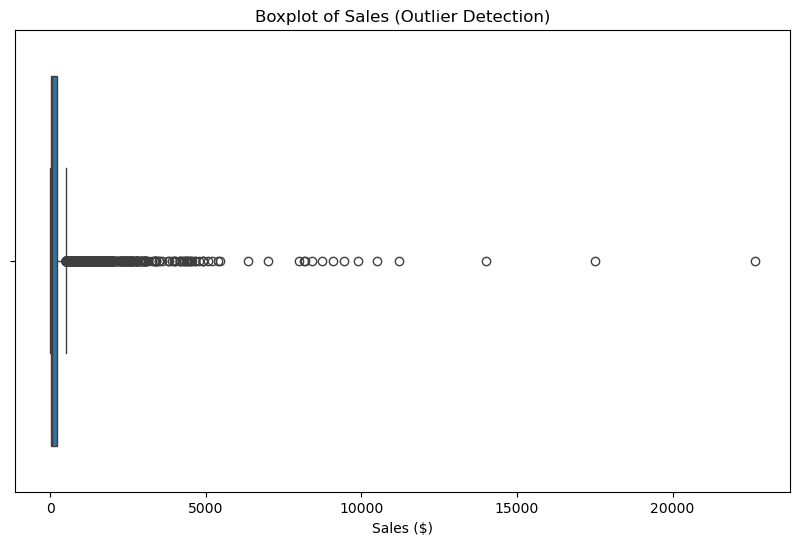

Number of Sales outliers: 1167
   Order Date      Sales    Profit  \
1  2016-11-08   731.9400  219.5820   
3  2015-10-11   957.5775 -383.0310   
7  2014-06-09   907.1520   90.7152   
10 2014-06-09  1706.1840   85.3092   
11 2014-06-09   911.4240   68.3568   

                                         Product Name  
1   Hon Deluxe Fabric Upholstered Stacking Chairs,...  
3       Bretford CR4500 Series Slim Rectangular Table  
7                      Mitel 5320 IP Phone VoIP phone  
10           Chromcraft Rectangular Conference Tables  
11      Konftel 250 Conference phone - Charcoal black  


In [37]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales (Outlier Detection)')
plt.xlabel('Sales ($)')
plt.show()

Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))]
print(f"Number of Sales outliers: {len(outliers)}")
print(outliers[['Order Date', 'Sales', 'Profit', 'Product Name']].head())

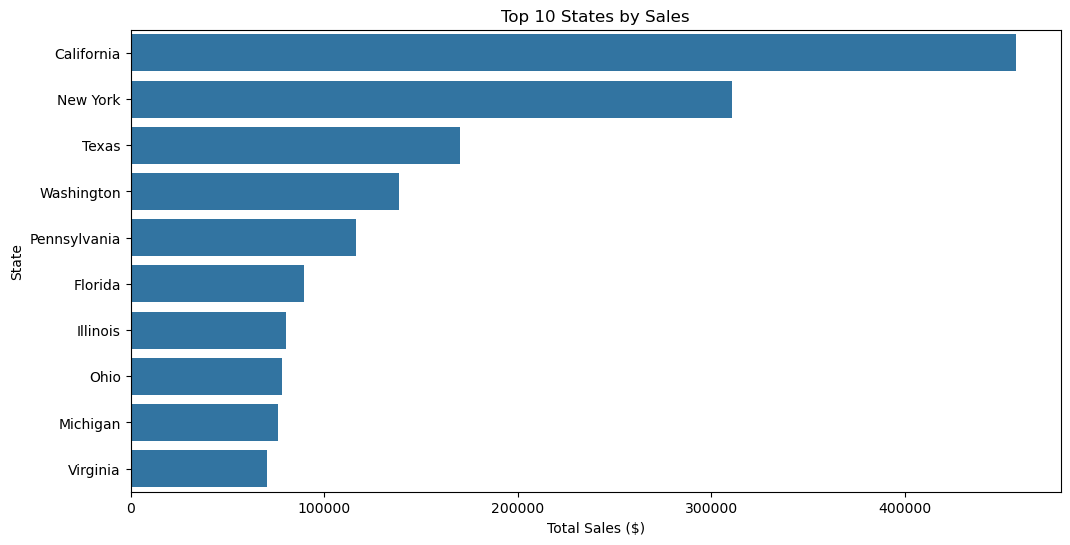

          State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140
5       Florida   89473.7080
6      Illinois   80166.1010
7          Ohio   78258.1360
8      Michigan   76269.6140
9      Virginia   70636.7200


In [38]:

state_sales = df.groupby('State')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='State', data=state_sales)
plt.title('Top 10 States by Sales')
plt.xlabel('Total Sales ($)')
plt.show()
print(state_sales)

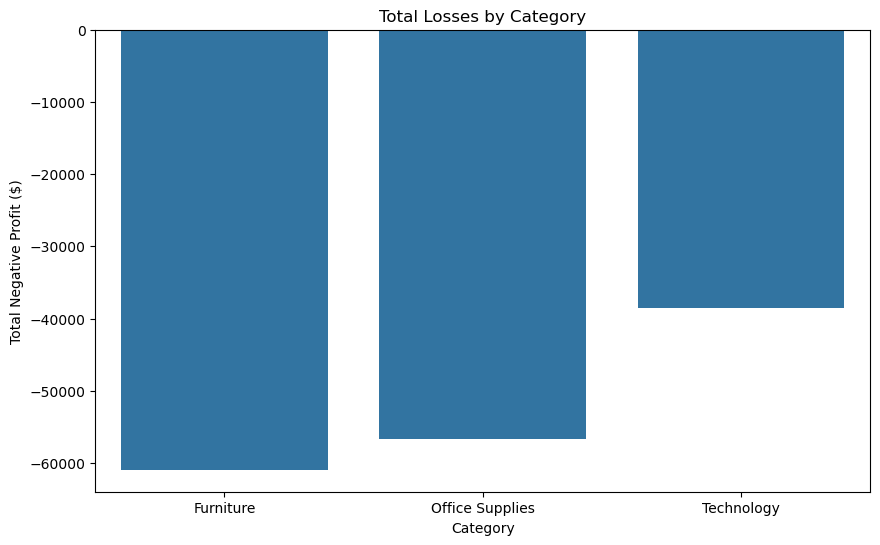

          Category      Profit
0        Furniture -60936.1090
1  Office Supplies -56615.2585
2       Technology -38579.9182


In [39]:

losses = df[df['Profit'] < 0].groupby('Category')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=losses)
plt.title('Total Losses by Category')
plt.ylabel('Total Negative Profit ($)')
plt.show()
print(losses)

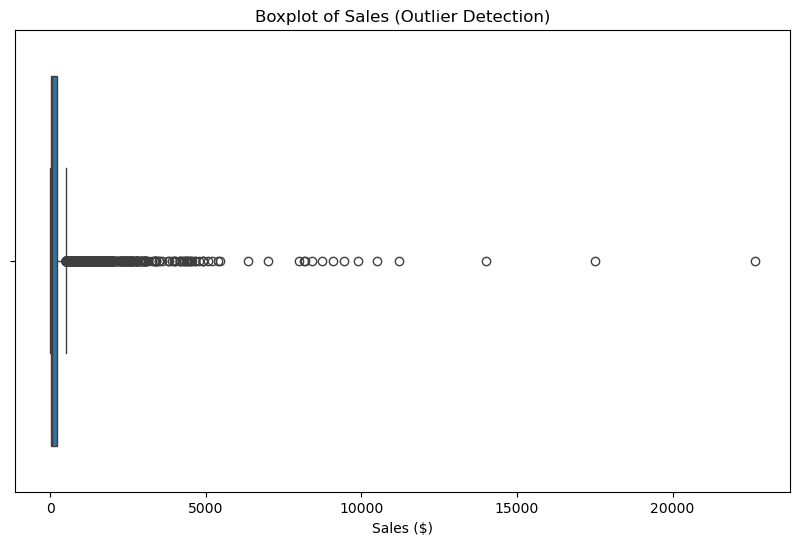

Number of Sales outliers: 1167
Sample of outliers:
    Order Date      Sales    Profit  \
1   2016-11-08   731.9400  219.5820   
3   2015-10-11   957.5775 -383.0310   
7   2014-06-09   907.1520   90.7152   
10  2014-06-09  1706.1840   85.3092   
11  2014-06-09   911.4240   68.3568   

                                         Product Name  
1   Hon Deluxe Fabric Upholstered Stacking Chairs,...  
3       Bretford CR4500 Series Slim Rectangular Table  
7                      Mitel 5320 IP Phone VoIP phone  
10           Chromcraft Rectangular Conference Tables  
11      Konftel 250 Conference phone - Charcoal black  


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data (update the path if needed)
df = pd.read_csv('cleaned_superstore.csv')

# Insight 13: Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales (Outlier Detection)')
plt.xlabel('Sales ($)')
plt.show()

# Calculate outliers using IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))]
print(f"Number of Sales outliers: {len(outliers)}")
print("Sample of outliers:")
print(outliers[['Order Date', 'Sales', 'Profit', 'Product Name']].head())

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data (update the path)
df = pd.read_csv('cleaned_superstore.csv')

# Calculate outliers using IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

# Print details
print(f"Q1: ${Q1:.2f}")
print(f"Q3: ${Q3:.2f}")
print(f"IQR: ${IQR:.2f}")
print(f"Upper Bound: ${upper_bound:.2f}")
print(f"Number of Sales outliers: {len(outliers)}")
print("\nTop 10 highest sales outliers:")
print(outliers[['Order Date', 'Sales', 'Profit', 'Product Name', 'Category']].nlargest(10, 'Sales'))
print("\nSummary of outlier sales:")
print(outliers['Sales'].describe())

Q1: $17.28
Q3: $209.94
IQR: $192.66
Upper Bound: $498.93
Number of Sales outliers: 1167

Top 10 highest sales outliers:
      Order Date      Sales     Profit  \
2697  2014-03-18  22638.480 -1811.0784   
6826  2016-10-02  17499.950  8399.9760   
8153  2017-03-23  13999.960  6719.9808   
2623  2017-10-22  11199.968  3919.9888   
4190  2017-11-17  10499.970  5039.9856   
9039  2016-12-17   9892.740  4946.3700   
4098  2014-09-23   9449.950  4630.4755   
4277  2016-04-16   9099.930  2365.9818   
8488  2016-02-02   8749.950  2799.9840   
6425  2016-05-23   8399.976  1119.9968   

                                           Product Name         Category  
2697  Cisco TelePresence System EX90 Videoconferenci...       Technology  
6826              Canon imageCLASS 2200 Advanced Copier       Technology  
8153              Canon imageCLASS 2200 Advanced Copier       Technology  
2623              Canon imageCLASS 2200 Advanced Copier       Technology  
4190              Canon imageCLASS 2200 Ad

In [44]:
df['Month Order'] = df['Month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 
                                     'May': 5, 'June': 6, 'July': 7, 'August': 8, 
                                     'September': 9, 'October': 10, 'November': 11, 'December': 12})
df.to_csv('cleaned_superstore.csv', index=False)